# LeNet 5



In [1]:
from algorithms import *
from lenet5 import *
import numpy as np
import matplotlib.pyplot as plt

_, (test_x, test_y) = load_MNIST()

path = './data/lenet5'

lenet5 = LeNet5(path=path, load=True)

epsilon = 0.25
d = 28*28

lab = lenet5.predict(test_x)
indexes = lab == test_y
data = test_x[indexes]
labels = test_y[indexes]

print(len(labels))  # 9826

# M = num workers; we consider a number of workers <=10
M = 10
data_per_classes = []
for label_class in range(0, 10):
    data_per_classes.append(data[labels == label_class][:100])

data_per_classes = np.array(data_per_classes)
data_workers = []

for offset in range(0, 100, M):
    image_worker = []
    for c in range(0, 10):
        image_worker.extend(data_per_classes[c, offset:offset+M, :, :, :])
    data_workers.append(image_worker)

data_workers = np.array(data_workers)
print(data_workers.shape)  # now all 10 workers have 100 images, 10 for each class.

y = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.repeat(y, 10)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
9826
(10, 100, 28, 28, 1)


# Universal Adversarial Attacks

In [2]:
def plot_perturbation(perturbation, m):
  fig, ax = plt.subplots(figsize=(12, 12))
  img = plt.imshow(perturbation.reshape((28, 28)))
  fig.colorbar(img, ax=ax, fraction=0.03, pad=0.05)
  plt.savefig(f"./perturbation_{m}", bbox_inches="tight")
  plt.show()

def plot_perturbated_img(perturbation, m):
  image = test_x[5].numpy().reshape(28,28)
  img_noise = image + perturbation.reshape((28, 28))
  fig, ax = plt.subplots(1, 2,figsize=(5, 5))
  a = ax[0].imshow(image, cmap='Greys')
  b = ax[1].imshow(img_noise, cmap='Greys')
  fig.colorbar(a, ax=ax[0], fraction=0.03, pad=0.05)
  fig.colorbar(b, ax=ax[1], fraction=0.03, pad=0.05)
  plt.savefig(f"./image_perturbation_example_{m}", bbox_inches="tight")
  plt.show()

def plot_loss(loss_history, m):
  plt.figure(figsize=(10,6))
  plt.plot(m, loss_history[:, 0])
  plt.title('loss')

def plot_accuracy(loss_history, m):
  plt.figure(figsize=(10,6))
  plt.plot(m, loss_history[:, 1])
  plt.title('accuracy')

## Decentralized Stochastic Gradient Free FW

Iteration number  1
Iteration number  2
Iteration number  3
Iteration number  4
Iteration number  5
Iteration number  6
Iteration number  7
Iteration number  8
Iteration number  9
Iteration number  10
Iteration number  11
Iteration number  12
Iteration number  13
Iteration number  14
Iteration number  15
Iteration number  16
Iteration number  17
Iteration number  18
Iteration number  19
Iteration number  20


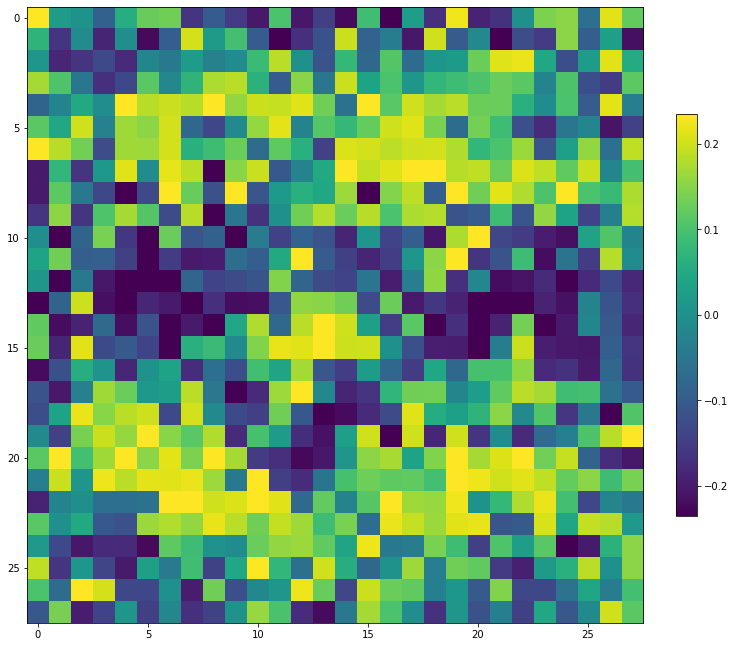

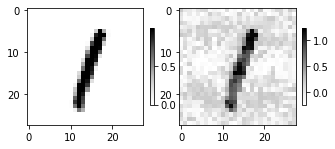

308/308 [==============================] - 3s 10ms/step - loss: 1.8705 - accuracy: 0.5834
Iteration number  1
Iteration number  2
Iteration number  3
Iteration number  4
Iteration number  5
Iteration number  6
Iteration number  7
Iteration number  8
Iteration number  9
Iteration number  10
Iteration number  11
Iteration number  12
Iteration number  13
Iteration number  14
Iteration number  15
Iteration number  16
Iteration number  17
Iteration number  18
Iteration number  19
Iteration number  20


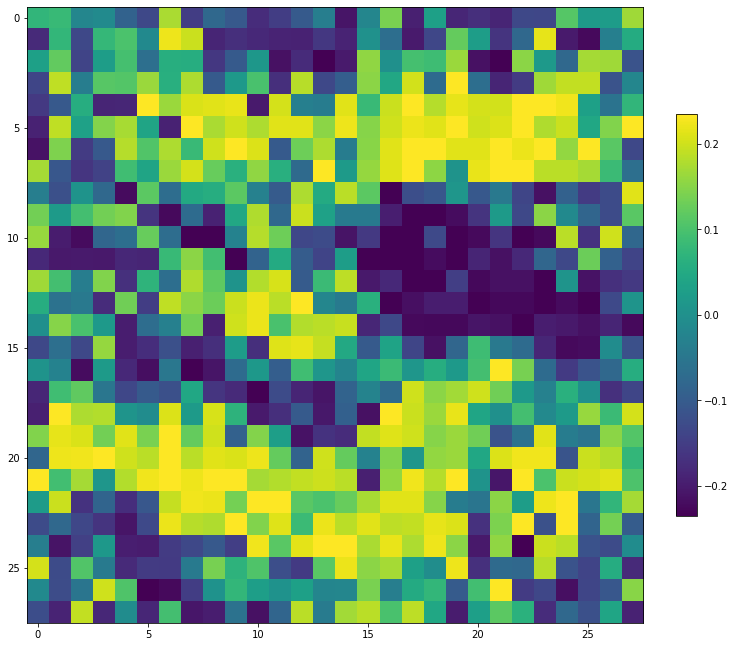

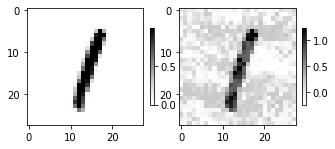

308/308 [==============================] - 3s 9ms/step - loss: 3.3252 - accuracy: 0.4555
Iteration number  1
Iteration number  2
Iteration number  3
Iteration number  4
Iteration number  5
Iteration number  6
Iteration number  7
Iteration number  8
Iteration number  9
Iteration number  10
Iteration number  11
Iteration number  12
Iteration number  13
Iteration number  14
Iteration number  15
Iteration number  16
Iteration number  17
Iteration number  18
Iteration number  19
Iteration number  20


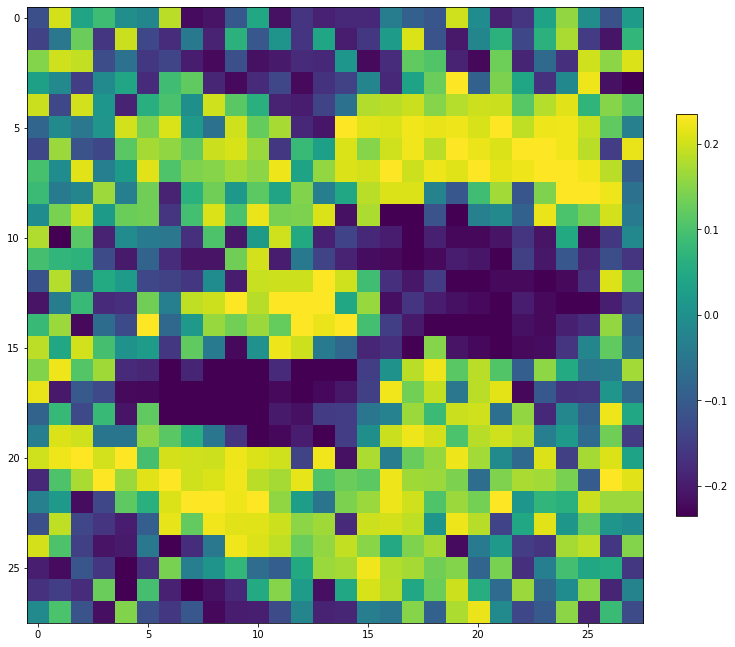

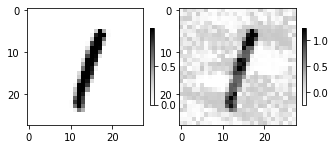

308/308 [==============================] - 3s 10ms/step - loss: 3.7442 - accuracy: 0.4175
Iteration number  1
Iteration number  2
Iteration number  3
Iteration number  4
Iteration number  5
Iteration number  6
Iteration number  7
Iteration number  8
Iteration number  9
Iteration number  10
Iteration number  11
Iteration number  12
Iteration number  13
Iteration number  14
Iteration number  15
Iteration number  16
Iteration number  17
Iteration number  18
Iteration number  19
Iteration number  20


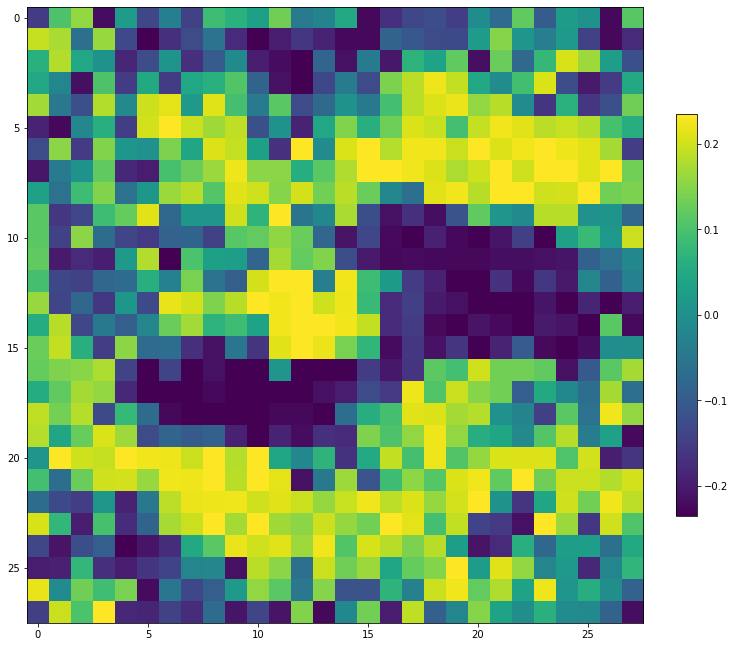

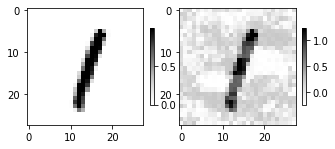

308/308 [==============================] - 3s 10ms/step - loss: 4.0363 - accuracy: 0.4050
Iteration number  1
Iteration number  2
Iteration number  3
Iteration number  4
Iteration number  5
Iteration number  6
Iteration number  7
Iteration number  8
Iteration number  9
Iteration number  10
Iteration number  11
Iteration number  12
Iteration number  13
Iteration number  14
Iteration number  15
Iteration number  16
Iteration number  17
Iteration number  18
Iteration number  19
Iteration number  20


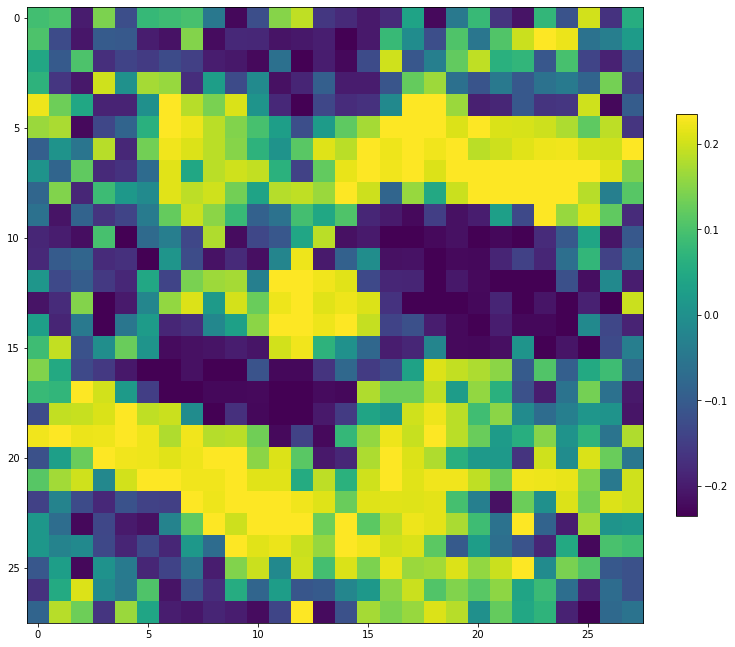

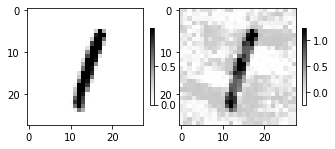

308/308 [==============================] - 3s 10ms/step - loss: 4.5742 - accuracy: 0.3705
Iteration number  1
Iteration number  2
Iteration number  3
Iteration number  4
Iteration number  5
Iteration number  6
Iteration number  7
Iteration number  8
Iteration number  9
Iteration number  10
Iteration number  11
Iteration number  12
Iteration number  13
Iteration number  14
Iteration number  15
Iteration number  16
Iteration number  17
Iteration number  18
Iteration number  19
Iteration number  20


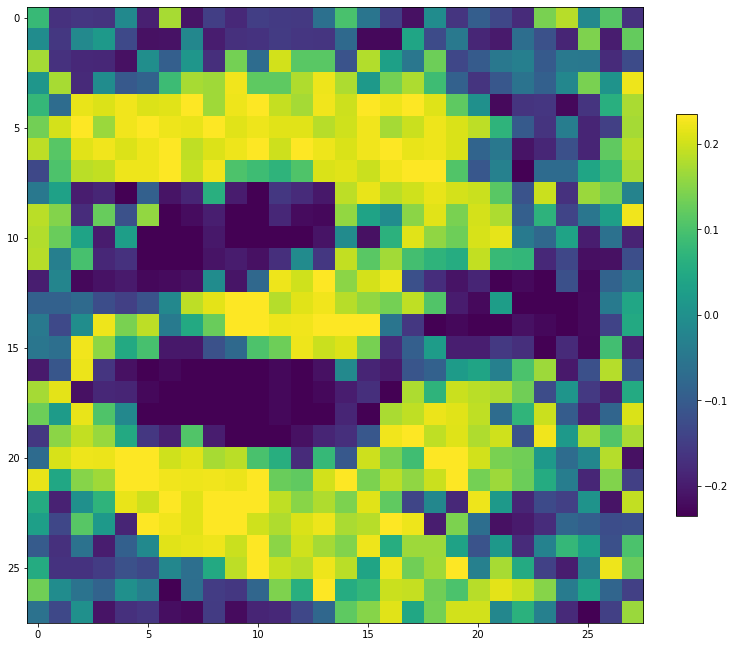

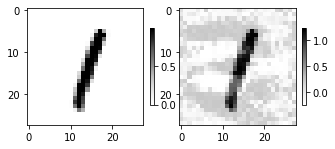

308/308 [==============================] - 3s 9ms/step - loss: 5.6848 - accuracy: 0.3120


In [4]:
T = 20

loss_history = []

for m in range(5, 40, 5):
  print ("m = ", m)
  delta = decentralized_stochastic_gradient_free_FW(data_workers, y, lenet5.negative_loss, m, T, M, epsilon, d)
  np.save(f"./data/perturbation_{m}", delta[-1])

  plot_perturbation(delta[-1], m)
  plot_perturbated_img(delta[-1], m)

  perturbation = np.tile(delta[-1], data.shape[0])
  perturbation = perturbation.reshape((data.shape[0],28,28,1))
  perturbated_data = data + perturbation
  perturbated_data = np.clip(perturbated_data, 0., 1.)

  loss = lenet5.model.evaluate(perturbated_data, labels)
  loss_history.append(loss)


In [ ]:
m=40
delta = decentralized_stochastic_gradient_free_FW(data_workers, y, lenet5.negative_loss, m, T, M, epsilon, d)
np.save(f"./data/perturbation_{m}", delta[-1])

plot_perturbation(delta[-1], m)
plot_perturbated_img(delta[-1], m)

perturbation = np.tile(delta[-1], data.shape[0])
perturbation = perturbation.reshape((data.shape[0],28,28,1))
perturbated_data = data + perturbation
perturbated_data = np.clip(perturbated_data, 0., 1.)

loss = lenet5.model.evaluate(perturbated_data, labels)
loss_history.append(loss)

Iteration number  1
Iteration number  2


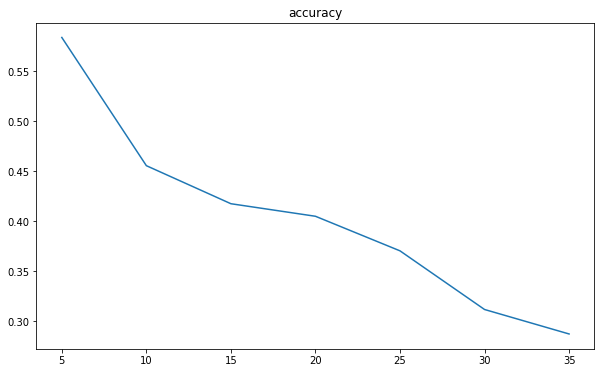

In [23]:
history = np.array(loss_history)
m = [5, 10, 15, 20, 25, 30, 35]

plot_accuracy(history, m)

# Tests

In [7]:
m=35
#np.save(f"./data/perturbation_{m}", delta[-1])
delta = np.load(f"./perturbations/perturbation_{m}.npy")
delta.shape

(784,)

In [10]:
image = test_x[5].numpy().reshape(28,28)
img_noise = image + delta.reshape((28, 28))
print(lenet5.predict(np.array([img_noise.reshape(28, 28 ,1)])))

[3]


In [ ]:
image = test_x[5].numpy().reshape(28,28)
delta_mean = np.mean(delta, axis=0)
img_noise = image + delta_mean.reshape((28, 28))
fig, ax = plt.subplots(1, 2,figsize=(5, 5))
ax[0].imshow(image, cmap='Greys')
ax[1].imshow(img_noise, cmap='Greys')
plt.savefig(f"./image_perturbation_example_{m}", bbox_inches="tight")
plt.show()
print(lenet5.predict(np.array([img_noise.reshape(28, 28 ,1)])))

In [22]:
perturbation = np.tile(delta[-1], data.shape[0])
perturbation = perturbation.reshape((data.shape[0],28,28,1))
perturbated_data = data + perturbation
perturbated_data = np.clip(perturbated_data, 0., 1.)

In [23]:
lenet5.model.evaluate(perturbated_data, labels)

307/307 [==============================] - 3s 10ms/step - loss: 2.3129 - accuracy: 0.6238


[2.312938928604126, 0.6237623691558838]

In [16]:
lenet5.model.evaluate(data, labels)

307/307 [==============================] - 3s 10ms/step - loss: 0.0113 - accuracy: 1.0000


[0.011310586705803871, 1.0]

In [30]:
# Gaussian noise
gaussian_noise_data = data + np.random.normal(0, 0.3, data.shape)
gaussian_noise_data = np.clip(gaussian_noise_data, 0., 1.)
lenet5.model.evaluate(gaussian_noise_data, labels)

307/307 [==============================] - 3s 10ms/step - loss: 1.0043 - accuracy: 0.8067


[1.004286766052246, 0.8066754937171936]

In [25]:
gaussian_noise_data.shape

(9797, 28, 28, 1)

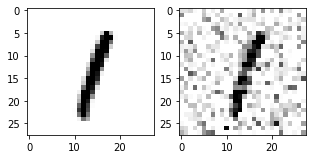

In [31]:
gaussian_noise = np.random.normal(0, 0.3, (28,28))
fig, ax = plt.subplots(1, 2,figsize=(5, 5))
ax[0].imshow(image, cmap='Greys')
ax[1].imshow(np.clip(image+gaussian_noise, 0.,1.), cmap='Greys')
plt.savefig(f"./gaussian_noise_{m}", bbox_inches="tight")
plt.show()
